In [1]:
import requests
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [4]:
def get_movie_recommendations(genre=None, mood=None, popularity=False):
    api_key = "493b4a0a718edb719b7622e880c7cffc"  # Replace with your TMDB API key
    base_url = "https://api.themoviedb.org/3/discover/movie"
    params = {
        "api_key": api_key,
        "sort_by": "popularity.desc" if popularity else "vote_average.desc",
        "vote_count.gte": 100,
        "language": "en-US"
    }
    if genre:
        genre_dict = {
            "action": 28,
            "comedy": 35,
            "drama": 18,
            "horror": 27,
            "sci-fi": 878,
            "romance": 10749,
            "thriller": 53
        }
        params["with_genres"] = genre_dict.get(genre.lower())
    if mood:
        mood_dict = {
            "happy": "35,10749",
            "sad": "18,10749",
            "exciting": "28,53",
            "dark": "27,53",
            "thoughtful": "18,878"
        }
        params["with_genres"] = mood_dict.get(mood.lower())
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        movies = response.json().get("results", [])
        if movies:
            return movies[:10]  # Return top 10 movies
    return None        

In [5]:
def recommend_similar_movies(movies):
    descriptions = [movie['overview'] for movie in movies if 'overview' in movie]
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(descriptions)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    most_similar_index = np.argmax(np.sum(similarity_matrix, axis=1))
    return movies[most_similar_index] if movies else None

In [6]:
def plot_movie_popularity(movies):
    titles = [movie['title'] for movie in movies]
    popularity = [movie['popularity'] for movie in movies]
    
    plt.figure(figsize=(10, 5))
    plt.barh(titles, popularity, color='skyblue')
    plt.xlabel("Popularity Score")
    plt.ylabel("Movie Title")
    plt.title("Top 10 Movies by Popularity")
    plt.gca().invert_yaxis()
    plt.show()

In [7]:
def plot_movie_ratings(movies):
    titles = [movie['title'] for movie in movies]
    ratings = [movie['vote_average'] for movie in movies]
    
    plt.figure(figsize=(10, 5))
    plt.barh(titles, ratings, color='orange')
    plt.xlabel("Average Rating")
    plt.ylabel("Movie Title")
    plt.title("Top 10 Movies by Rating")
    plt.gca().invert_yaxis()
    plt.show()

In [8]:
def plot_movie_release_years(movies):
    years = [int(movie['release_date'][:4]) for movie in movies if 'release_date' in movie and movie['release_date']]
    
    plt.figure(figsize=(8, 5))
    plt.hist(years, bins=range(min(years), max(years) + 1), color='green', edgecolor='black', alpha=0.7)
    plt.xlabel("Release Year")
    plt.ylabel("Number of Movies")
    plt.title("Distribution of Movie Release Years")
    plt.show()

Welcome to the Movie Recommendation Chatbot!
Kill Shot (2023) - Popularity: 3.702, Rating: 9.201
Counterattack (2025) - Popularity: 39.916, Rating: 8.567
The Dark Knight (2008) - Popularity: 15.986, Rating: 8.519
The Lord of the Rings: The Return of the King (2003) - Popularity: 14.934, Rating: 8.5
Seven Samurai (1954) - Popularity: 4.46, Rating: 8.458
The Lord of the Rings: The Fellowship of the Ring (2001) - Popularity: 17.143, Rating: 8.4
Harakiri (1962) - Popularity: 4.13, Rating: 8.415
The Lord of the Rings: The Two Towers (2002) - Popularity: 10.367, Rating: 8.4
Spider-Man: Into the Spider-Verse (2018) - Popularity: 9.9, Rating: 8.396
The Empire Strikes Back (1980) - Popularity: 4.053, Rating: 8.391


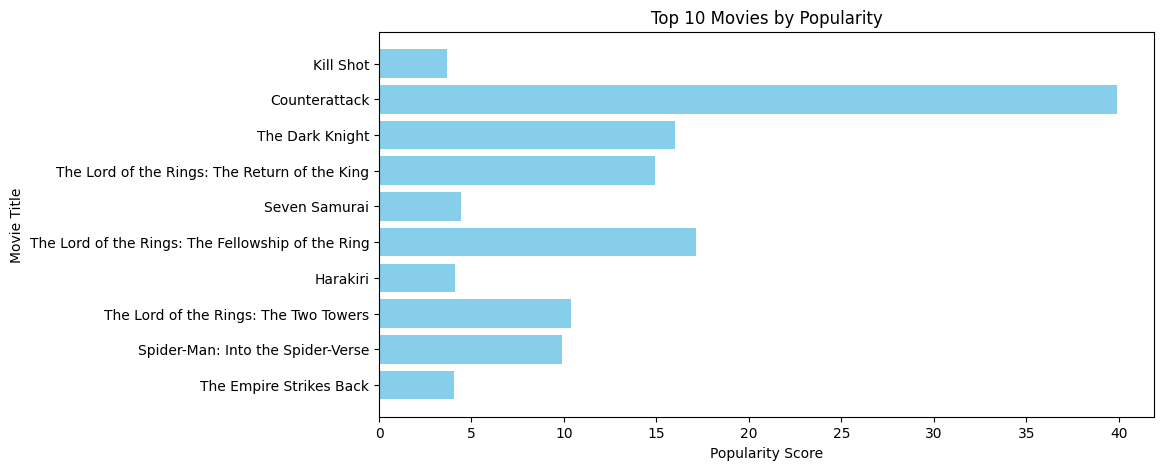

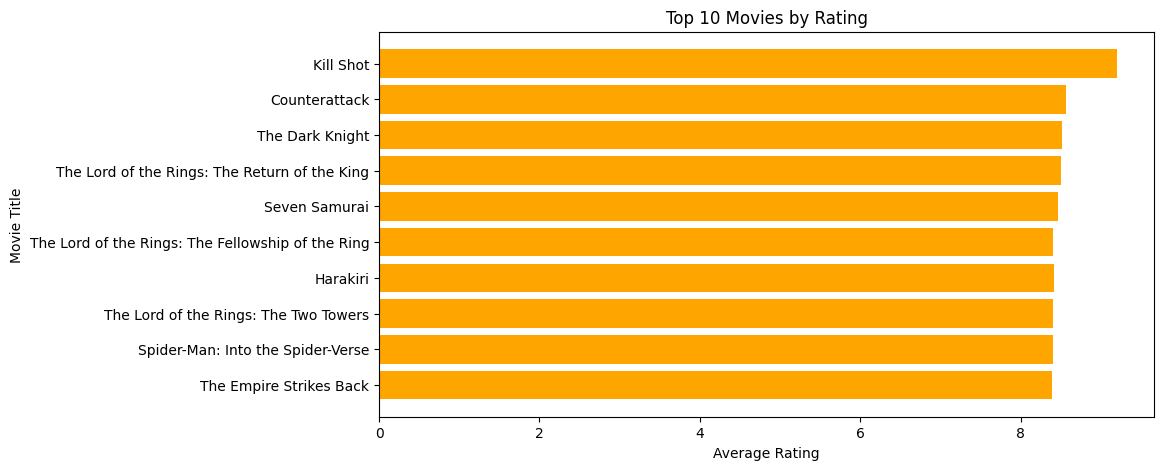

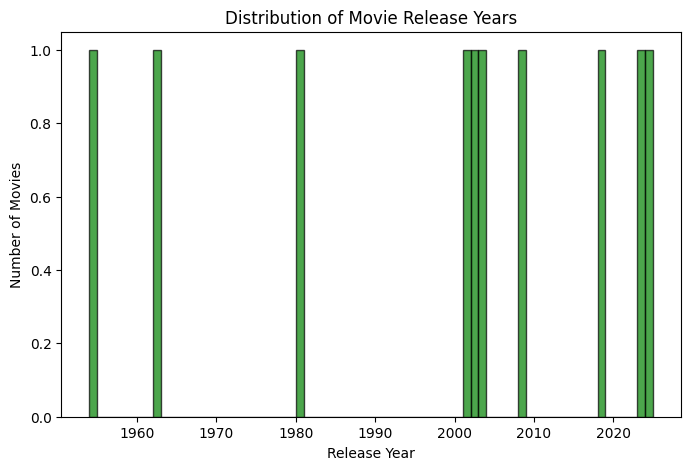

You might also like: The Lord of the Rings: The Return of the King (2003)
Overview: As armies mass for a final battle that will decide the fate of the world--and powerful, ancient forces of Light and Dark compete to determine the outcome--one member of the Fellowship of the Ring is revealed as the noble heir to the throne of the Kings of Men. Yet, the sole hope for triumph over evil lies with a brave hobbit, Frodo, who, accompanied by his loyal friend Sam and the hideous, wretched Gollum, ventures deep into the very dark heart of Mordor on his seemingly impossible quest to destroy the Ring of Power.​
Dilwale Dulhania Le Jayenge (1995) - Popularity: 4.886, Rating: 8.5
Your Name. (2016) - Popularity: 9.166, Rating: 8.486
Forrest Gump (1994) - Popularity: 9.967, Rating: 8.468
Drawing Closer (2024) - Popularity: 7.303, Rating: 8.4
Cinema Paradiso (1988) - Popularity: 4.104, Rating: 8.4
Gabriel's Inferno (2020) - Popularity: 1.638, Rating: 8.413
Gabriel's Inferno: Part II (2020) - Popularit

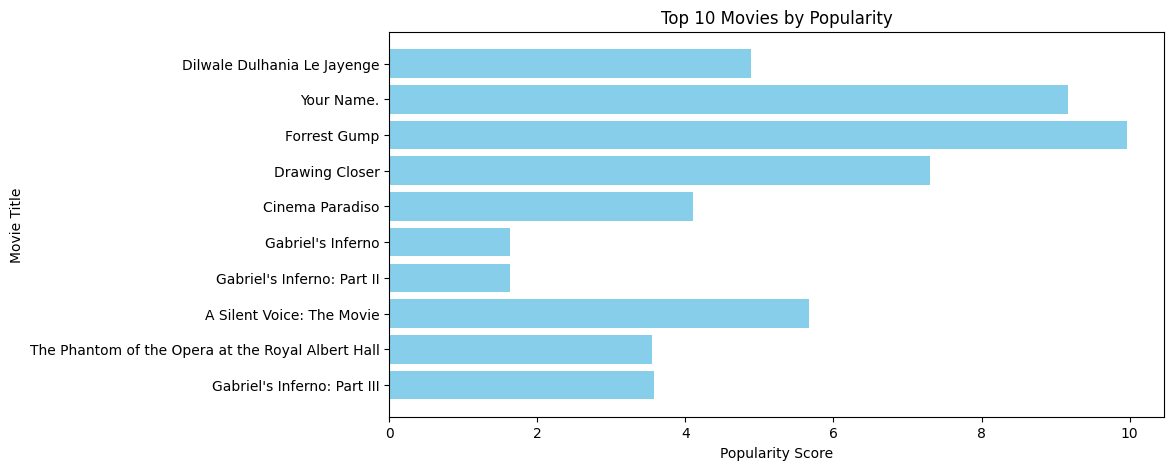

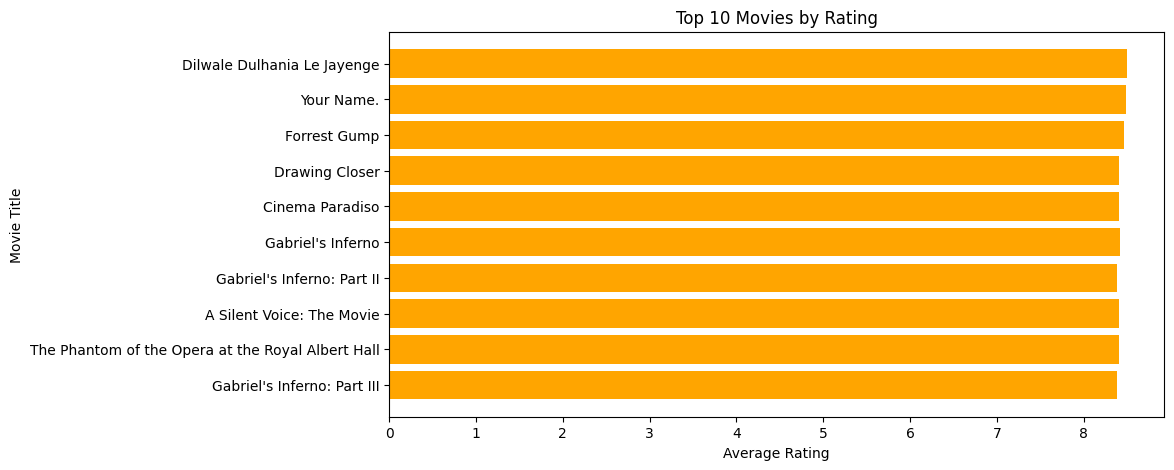

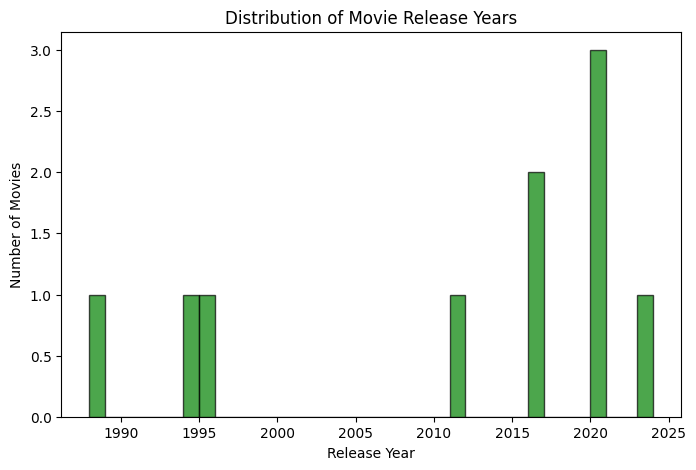

You might also like: Gabriel's Inferno (2020)
Overview: An intriguing and sinful exploration of seduction, forbidden love, and redemption, Gabriel's Inferno is a captivating and wildly passionate tale of one man's escape from his own personal hell as he tries to earn the impossible--forgiveness and love.
Sorry, I couldn't find a recommendation for that category. Try again!
Goodbye!


In [9]:
def main():
    print("Welcome to the Movie Recommendation Chatbot!")
    while True:
        user_input = input("Enter a genre, mood, or type 'popular' for top movies (or 'exit' to quit): ").strip().lower()
        if user_input == "exit":
            print("Goodbye!")
            break
        
        movies = None
        if user_input in ["action", "comedy", "drama", "horror", "sci-fi", "romance", "thriller"]:
            movies = get_movie_recommendations(genre=user_input)
        elif user_input in ["happy", "sad", "exciting", "dark", "thoughtful"]:
            movies = get_movie_recommendations(mood=user_input)
        elif user_input == "popular":
            movies = get_movie_recommendations(popularity=True)
        
        if movies:
            for movie in movies:
                print(f"{movie['title']} ({movie['release_date'][:4]}) - Popularity: {movie['popularity']}, Rating: {movie['vote_average']}")
            plot_movie_popularity(movies)
            plot_movie_ratings(movies)
            plot_movie_release_years(movies)
            
            similar_movie = recommend_similar_movies(movies)
            if similar_movie:
                print(f"You might also like: {similar_movie['title']} ({similar_movie['release_date'][:4]})")
                print(f"Overview: {similar_movie['overview']}")
        else:
            print("Sorry, I couldn't find a recommendation for that category. Try again!")

if __name__ == "__main__":
    main()